This script combines 3(times, cwur, shanghai) world university rankings data frames for project analysis.

Import Libraries and data frames

In [1]:
import pandas as pd
import numpy as np
import os
import quandl
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels
import warnings
import json
import folium

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', None)

In [3]:
path = r'C:\Users\justi\University Scores'

In [4]:
times_df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'times_df_cleaned.pkl'))
shanghai_df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'shanghai_df_cleaned.pkl'))
cwur_df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'cwur_df_cleaned.pkl'))

Basic Understanding of Columns

In [5]:
times_df.columns

Index(['times_world_rank', 'institution', 'country', 'teaching',
       'international', 'research', 'citations', 'income', 'times_score',
       'num_students', 'student_staff_ratio',
       'percentage_international_students', 'female_male_ratio', 'year',
       'times_rank_flag_top_x', 'country_code', 'continent_code'],
      dtype='object')

In [6]:
times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   times_world_rank                   2603 non-null   float64
 1   institution                        2603 non-null   object 
 2   country                            2603 non-null   object 
 3   teaching                           2603 non-null   float64
 4   international                      2603 non-null   object 
 5   research                           2603 non-null   float64
 6   citations                          2603 non-null   float64
 7   income                             2603 non-null   object 
 8   times_score                        1201 non-null   float64
 9   num_students                       2544 non-null   float64
 10  student_staff_ratio                2544 non-null   float64
 11  percentage_international_students  2536 non-null   objec

In [7]:
shanghai_df.columns

Index(['shanghai_world_rank', 'institution', 'shanghai_national_rank',
       'shanghai_total_score', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp',
       'year', 'country', 'shanghai_rank_flag_top_x', 'country_code',
       'continent_code'],
      dtype='object')

In [8]:
shanghai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   shanghai_world_rank       4896 non-null   float64
 1   institution               4896 non-null   object 
 2   shanghai_national_rank    4896 non-null   object 
 3   shanghai_total_score      1101 non-null   float64
 4   alumni                    4896 non-null   float64
 5   award                     4895 non-null   float64
 6   hici                      4895 non-null   float64
 7   ns                        4875 non-null   float64
 8   pub                       4895 non-null   float64
 9   pcp                       4895 non-null   float64
 10  year                      4896 non-null   int64  
 11  country                   3820 non-null   object 
 12  shanghai_rank_flag_top_x  4896 non-null   float64
 13  country_code              3820 non-null   object 
 14  continen

In [9]:
cwur_df.columns

Index(['cwur_world_rank', 'institution', 'country', 'cwur_national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'cwur_score', 'year', 'cwur_rank_flag_top_x', 'country_code',
       'continent_code'],
      dtype='object')

In [10]:
cwur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cwur_world_rank       2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   cwur_national_rank    2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  cwur_score            2200 non-null   float64
 13  year                  2200 non-null   int64  
 14  cwur_rank_flag_top_x  2200 non-null   float64
 15  country_code         

Simple Analysis and Observations of top 100

In [11]:
times_df_top_100 = times_df[times_df['times_world_rank'] <= 100]
shanghai_df_top_100 = shanghai_df[shanghai_df['shanghai_world_rank'] <= 100]
cwur_df_top_100 = cwur_df[cwur_df['cwur_world_rank'] <= 100]

In [12]:
times_df_top_100['year'].value_counts()

2013    101
2014    101
2011    100
2012    100
2015    100
2016    100
Name: year, dtype: int64

In [13]:
shanghai_df_top_100['year'].value_counts()

2006    101
2007    101
2011    101
2005    100
2008    100
2009    100
2010    100
2012    100
2014    100
2015    100
2013     98
Name: year, dtype: int64

In [14]:
cwur_df_top_100['year'].value_counts()

2012    100
2013    100
2014    100
2015    100
Name: year, dtype: int64

Top 100 Analysis By Country

In [15]:
times_df_top_100['country'].value_counts()

United States of America    281
United Kingdom               74
Netherlands                  33
Germany                      32
Australia                    31
Canada                       26
China                        25
Switzerland                  18
France                       16
Sweden                       14
South Korea                  14
Japan                        12
Singapore                    10
Belgium                       8
Finland                       3
Ireland                       2
Italy                         1
Turkey                        1
Denmark                       1
Name: country, dtype: int64

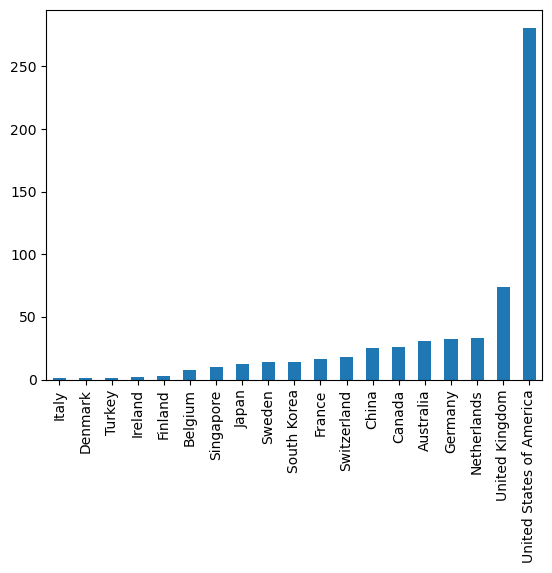

In [16]:
times_top_100_bar_country = times_df_top_100['country'].value_counts().sort_index().sort_values().plot.bar()

In [17]:
shanghai_df_top_100['country'].value_counts()

United States of America    584
United Kingdom              111
Germany                      53
Japan                        50
Canada                       44
France                       39
Switzerland                  39
Australia                    37
Sweden                       37
Netherlands                  27
Denmark                      19
Israel                       17
Russia                       11
Norway                       11
Finland                      11
Belgium                       8
Italy                         2
Austria                       1
Name: country, dtype: int64

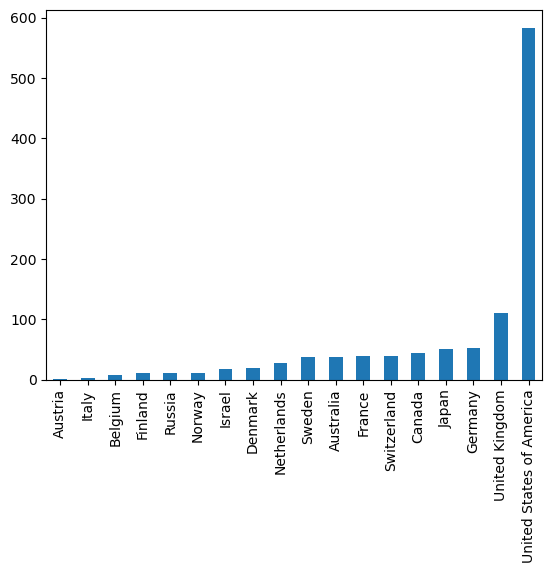

In [18]:
shanghai_top_100_bar_country = shanghai_df_top_100['country'].value_counts().sort_index().sort_values().plot.bar()

In [19]:
cwur_df_top_100['country'].value_counts()

United States of America    223
United Kingdom               29
Japan                        26
France                       18
Switzerland                  16
Israel                       14
Canada                       13
Germany                      11
Australia                     8
Netherlands                   6
China                         6
South Korea                   5
Sweden                        5
Denmark                       4
Italy                         3
Norway                        3
Singapore                     3
Russia                        3
Finland                       2
Belgium                       2
Name: country, dtype: int64

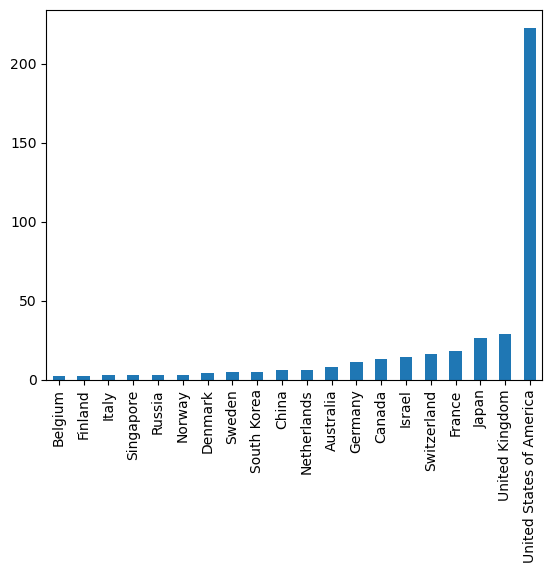

In [20]:
cwur_top_100_bar_country = cwur_df_top_100['country'].value_counts().sort_index().sort_values().plot.bar()

Top 100 Universities by Country in 2015

In [21]:
times_df_top_100_2015 = times_df_top_100[times_df_top_100['year'] == 2015]
shanghai_df_top_100_2015 = shanghai_df_top_100[shanghai_df_top_100['year'] == 2015]
cwur_df_top_100_2015 = cwur_df_top_100[cwur_df_top_100['year'] == 2015]

In [22]:
times_df_top_100_2015_vc = times_df_top_100_2015.country.value_counts()
shanghai_df_top_100_2015_vc = shanghai_df_top_100_2015.country.value_counts()
cwur_df_top_100_2015_vc = cwur_df_top_100_2015.country.value_counts()

In [23]:
times_df_top_100_2015_vc_df = pd.DataFrame(times_df_top_100_2015_vc)
shanghai_df_top_100_2015_vc_df = pd.DataFrame(shanghai_df_top_100_2015_vc)
cwur_df_top_100_2015_vc_df = pd.DataFrame(cwur_df_top_100_2015_vc)

In [24]:
times_df_top_100_2015_vc_df = times_df_top_100_2015_vc_df.reset_index()
shanghai_df_top_100_2015_vc_df = shanghai_df_top_100_2015_vc_df.reset_index()
cwur_df_top_100_2015_vc_df = cwur_df_top_100_2015_vc_df.reset_index()

In [25]:
times_df_top_100_2015_vc_df.columns = ['country', 'times_counts']
shanghai_df_top_100_2015_vc_df.columns = ['country', 'shanghai_counts']
cwur_df_top_100_2015_vc_df.columns = ['country', 'cwur_counts']

In [26]:
tempcombined_df_top_100_2015 = times_df_top_100_2015_vc_df.merge(shanghai_df_top_100_2015_vc_df, on = ['country'], how = 'outer')

In [27]:
combined_df_top_100_2015 = tempcombined_df_top_100_2015.merge(cwur_df_top_100_2015_vc_df, on = ['country'], how = 'outer')

In [28]:
combined_df_top_100_2015 = combined_df_top_100_2015.fillna(value = 0)

In [29]:
combined_df_top_100_2015['times_counts'] = combined_df_top_100_2015['times_counts'].astype('float64')
combined_df_top_100_2015['shanghai_counts'] = combined_df_top_100_2015['shanghai_counts'].astype('float64')
combined_df_top_100_2015['cwur_counts'] = combined_df_top_100_2015['cwur_counts'].astype('float64')

In [30]:
combined_df_top_100_2015['Total_University_Count'] = combined_df_top_100_2015['times_counts'] + combined_df_top_100_2015['shanghai_counts'] + combined_df_top_100_2015['cwur_counts']

In [31]:
combined_df_top_100_2015

,country,times_counts,shanghai_counts,cwur_counts,Total_University_Count
0,United States of America,45.0,51.0,55.0,151.0
1,United Kingdom,11.0,9.0,7.0,27.0
2,Germany,6.0,4.0,2.0,12.0
3,Netherlands,6.0,4.0,2.0,12.0
4,Australia,5.0,4.0,2.0,11.0
5,Canada,4.0,4.0,3.0,11.0
6,China,4.0,0.0,3.0,7.0
7,Switzerland,3.0,4.0,4.0,11.0
8,Sweden,3.0,3.0,1.0,7.0
9,South Korea,3.0,0.0,2.0,5.0


Export DF

In [32]:
combined_df_top_100_2015.to_csv(os.path.join(path, 'Prepared Data', 'combined_top_100_university_counts_by_country_2015.csv'))

Top 100 Analysis By Continent

In [33]:
times_df_top_100['continent_code'].value_counts()

NA    307
EU    202
AS     62
OC     31
Name: continent_code, dtype: int64

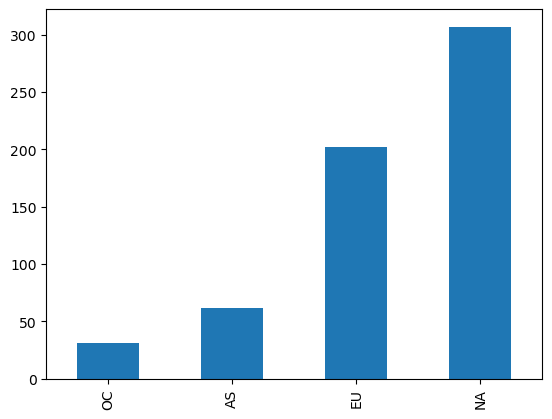

In [34]:
times_top_100_bar_continent = times_df_top_100['continent_code'].value_counts().sort_index().sort_values().plot.bar()

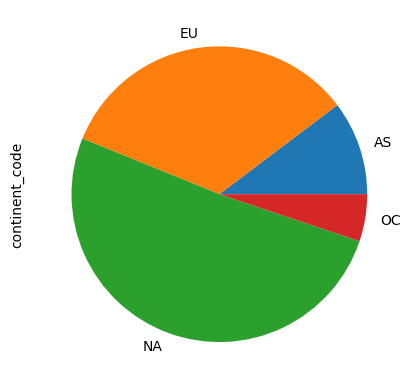

In [35]:
times_top_100_pie_continent = times_df_top_100['continent_code'].value_counts().sort_index().plot.pie()

In [36]:
shanghai_df_top_100['continent_code'].value_counts()

NA    628
EU    369
AS     67
OC     37
Name: continent_code, dtype: int64

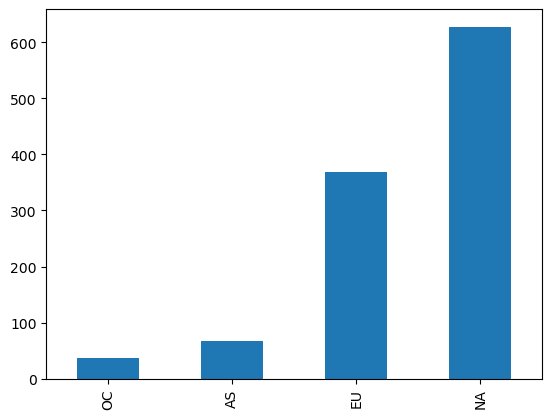

In [37]:
shanghai_top_100_bar_continent = shanghai_df_top_100['continent_code'].value_counts().sort_index().sort_values().plot.bar()

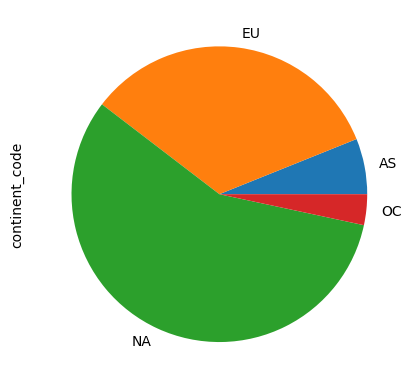

In [38]:
shanghai_top_100_pie_continent = shanghai_df_top_100['continent_code'].value_counts().sort_index().plot.pie()

In [39]:
cwur_df_top_100['continent_code'].value_counts()

NA    236
EU    102
AS     54
OC      8
Name: continent_code, dtype: int64

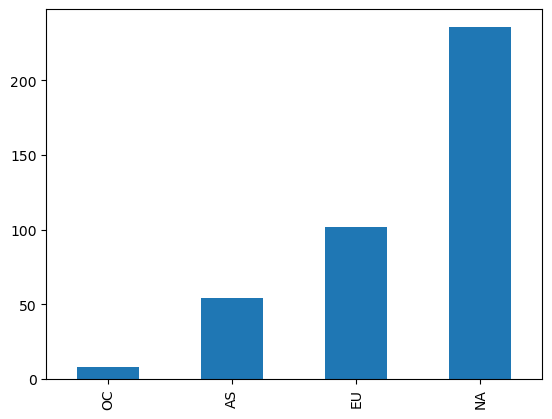

In [40]:
cwur_top_100_bar_continent = cwur_df_top_100['continent_code'].value_counts().sort_index().sort_values().plot.bar()

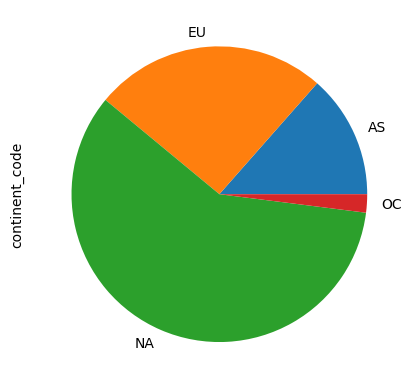

In [41]:
cwur_top_100_pie_continent = cwur_df_top_100['continent_code'].value_counts().sort_index().plot.pie()

Top 10 Highly Rated Universities

In [42]:
#Below I give every university their mean world ranking. I create a data frame with the information and only include top 25 universities.
#I then make sure the institution names match. I join the data frames on institution name. I then shorten the df to only include the top 10.

In [43]:
times_avg_score = times_df.groupby('institution').times_world_rank.mean()

In [44]:
shanghai_avg_score = shanghai_df.groupby('institution').shanghai_world_rank.mean()

In [45]:
cwur_avg_score = cwur_df.groupby('institution').cwur_world_rank.mean()

In [46]:
df_times_avg_score = pd.DataFrame(times_avg_score)
df_times_avg_score = df_times_avg_score.reset_index()

In [47]:
df_shanghai_avg_score = pd.DataFrame(shanghai_avg_score)
df_shanghai_avg_score = df_shanghai_avg_score.reset_index()

In [48]:
df_cwur_avg_score = pd.DataFrame(cwur_avg_score)
df_cwur_avg_score = df_cwur_avg_score.reset_index()

In [49]:
df_cwur_avg_score.head(5)

,institution,cwur_world_rank
0,AGH University of Science and Technology,717.5
1,Aalborg University,579.0
2,Aalto University,406.5
3,Aarhus University,120.5
4,Aberystwyth University,807.0


In [50]:
times_df_top_25 = df_times_avg_score[df_times_avg_score['times_world_rank'] <= 25]
shanghai_df_top_25 = df_shanghai_avg_score[df_shanghai_avg_score['shanghai_world_rank'] <= 25]
cwur_df_top_25 = df_cwur_avg_score[df_cwur_avg_score['cwur_world_rank'] <= 25]

In [51]:
times_df_top_25.sort_values('times_world_rank')

,institution,times_world_rank
53,California Institute of Technology,1.166667
156,Harvard University,2.833333
661,University of Oxford,3.166667
412,Stanford University,3.166667
254,Massachusetts Institute of Technology,5.166667
526,University of Cambridge,5.833333
358,Princeton University,6.000000
171,Imperial College London,8.666667
518,"University of California, Berkeley",9.333333
535,University of Chicago,10.166667


In [52]:
shanghai_df_top_25.sort_values('shanghai_world_rank')

,institution,shanghai_world_rank
100,Harvard University,1.000000
270,Stanford University,2.272727
404,"University of California, Berkeley",3.454545
162,Massachusetts Institute of Technology,4.090909
413,University of Cambridge,4.181818
27,California Institute of Technology,6.181818
233,Princeton University,7.272727
53,Columbia University,7.545455
418,University of Chicago,8.909091
534,University of Oxford,9.909091


In [53]:
cwur_df_top_25.sort_values('cwur_world_rank')

,institution,cwur_world_rank
184,Harvard University,1.00
511,Stanford University,2.25
312,Massachusetts Institute of Technology,3.00
637,University of Cambridge,4.25
819,University of Oxford,5.00
96,Columbia University,6.75
627,"University of California, Berkeley",7.75
432,Princeton University,8.00
648,University of Chicago,9.00
999,Yale University,9.75


In [54]:
#make the names the same
shanghai_df_top_25 = shanghai_df_top_25.replace(str('The Imperial College of Science, Technology and Medicine'), 'Imperial College London')
times_df_top_25 = times_df_top_25.replace(str('ETH Zurich – Swiss Federal Institute of Technology Zurich'), 'Swiss Federal Institute of Technology in Zurich')
shanghai_df_top_25 = shanghai_df_top_25.replace(str('Swiss Federal Institute of Technology Zurich'), 'Swiss Federal Institute of Technology in Zurich')

In [55]:
tempcombined_top_25_df = times_df_top_25.merge(shanghai_df_top_25, on = ['institution'], how = 'outer')

In [56]:
combined_top_25_df = tempcombined_top_25_df.merge(cwur_df_top_25, on = ['institution'], how = 'outer')

In [57]:
combined_top_25_df.sort_values('times_world_rank')

,institution,times_world_rank,shanghai_world_rank,cwur_world_rank
0,California Institute of Technology,1.166667,6.181818,10.00
6,Harvard University,2.833333,1.000000,1.00
19,University of Oxford,3.166667,9.909091,5.00
12,Stanford University,3.166667,2.272727,2.25
9,Massachusetts Institute of Technology,5.166667,4.090909,3.00
16,University of Cambridge,5.833333,4.181818,4.25
11,Princeton University,6.000000,7.272727,8.00
7,Imperial College London,8.666667,24.090909,NaN
14,"University of California, Berkeley",9.333333,3.454545,7.75
17,University of Chicago,10.166667,8.909091,9.00


In [58]:
combined_top_25_df['mean_world_rank'] = combined_top_25_df[['times_world_rank', 'shanghai_world_rank', 'cwur_world_rank']].mean(axis = 1).astype('float64')

In [59]:
combined_top_10_df = combined_top_25_df[combined_top_25_df['mean_world_rank'] < 9.55]

In [60]:
combined_top_10_df.sort_values('mean_world_rank').reset_index(drop = True)

,institution,times_world_rank,shanghai_world_rank,cwur_world_rank,mean_world_rank
0,Harvard University,2.833333,1.000000,1.00,1.611111
1,Stanford University,3.166667,2.272727,2.25,2.563131
2,Massachusetts Institute of Technology,5.166667,4.090909,3.00,4.085859
3,University of Cambridge,5.833333,4.181818,4.25,4.755051
4,California Institute of Technology,1.166667,6.181818,10.00,5.782828
5,University of Oxford,3.166667,9.909091,5.00,6.025253
6,"University of California, Berkeley",9.333333,3.454545,7.75,6.845960
7,Princeton University,6.000000,7.272727,8.00,7.090909
8,University of Chicago,10.166667,8.909091,9.00,9.358586
9,Columbia University,14.333333,7.545455,6.75,9.542929


Export Df

In [61]:
combined_top_10_df.to_csv(os.path.join(path, 'Prepared Data', 'avg_top_10_df.csv'))

Which Universities will be in top 10 forecasted data

In [62]:
#Group the data by institution and year to create a record of each institution's score by year
times_avg_score_by_year = times_df.groupby(['institution', 'year']).times_world_rank.mean()
shanghai_avg_score_by_year = shanghai_df.groupby(['institution', 'year']).shanghai_world_rank.mean()
cwur_avg_score_by_year = cwur_df.groupby(['institution', 'year']).cwur_world_rank.mean()

In [63]:
#Turn the results into a df
df_times_avg_score_by_year = pd.DataFrame(times_avg_score_by_year)
df_times_avg_score_by_year = df_times_avg_score_by_year.reset_index()
df_shanghai_avg_score_by_year = pd.DataFrame(shanghai_avg_score_by_year)
df_shanghai_avg_score_by_year = df_shanghai_avg_score_by_year.reset_index()
df_cwur_avg_score_by_year = pd.DataFrame(cwur_avg_score_by_year)
df_cwur_avg_score_by_year = df_cwur_avg_score_by_year.reset_index()

In [64]:
#Create a subset so it is easier to identify any mistakes in the data's institution names
times_df_top_25_by_year = df_times_avg_score_by_year[df_times_avg_score_by_year['times_world_rank'] <= 25]
shanghai_df_top_25_by_year = df_shanghai_avg_score_by_year[df_shanghai_avg_score_by_year['shanghai_world_rank'] <= 25]
cwur_df_top_25_by_year = df_cwur_avg_score_by_year[df_cwur_avg_score_by_year['cwur_world_rank'] <= 25]

In [65]:
times_df_top_25_by_year.sort_values('times_world_rank')

,institution,year,times_world_rank
425,Harvard University,2011,1.0
146,California Institute of Technology,2012,1.0
147,California Institute of Technology,2013,1.0
148,California Institute of Technology,2014,1.0
149,California Institute of Technology,2015,1.0
150,California Institute of Technology,2016,1.0
428,Harvard University,2014,2.0
429,Harvard University,2015,2.0
1179,Stanford University,2012,2.0
1180,Stanford University,2013,2.0


In [66]:
shanghai_df_top_25_by_year.sort_values('shanghai_world_rank')

,institution,year,shanghai_world_rank
678,Harvard University,2005,1.0
682,Harvard University,2009,1.0
683,Harvard University,2010,1.0
684,Harvard University,2011,1.0
685,Harvard University,2012,1.0
680,Harvard University,2007,1.0
687,Harvard University,2014,1.0
686,Harvard University,2013,1.0
679,Harvard University,2006,1.0
688,Harvard University,2015,1.0


In [67]:
cwur_df_top_25_by_year.sort_values('cwur_world_rank')

,institution,year,cwur_world_rank
387,Harvard University,2015,1.0
386,Harvard University,2014,1.0
385,Harvard University,2013,1.0
384,Harvard University,2012,1.0
1078,Stanford University,2015,2.0
1077,Stanford University,2014,2.0
1076,Stanford University,2013,2.0
653,Massachusetts Institute of Technology,2012,2.0
1075,Stanford University,2012,3.0
656,Massachusetts Institute of Technology,2015,3.0


In [68]:
shanghai_df_top_25_by_year = shanghai_df_top_25_by_year.replace(str('The Imperial College of Science, Technology and Medicine'), 'Imperial College London')
times_df_top_25_by_year = times_df_top_25_by_year.replace(str('ETH Zurich – Swiss Federal Institute of Technology Zurich'), 'Swiss Federal Institute of Technology in Zurich')
shanghai_df_top_25_by_year = shanghai_df_top_25_by_year.replace(str('Swiss Federal Institute of Technology Zurich'), 'Swiss Federal Institute of Technology in Zurich')

In [69]:
#Merge the data
tempcombined_top_25_df_by_year = times_df_top_25_by_year.merge(shanghai_df_top_25_by_year, on = ['institution', 'year'], how = 'outer')

In [70]:
combined_top_25_df_by_year = tempcombined_top_25_df_by_year.merge(cwur_df_top_25_by_year, on = ['institution', 'year'], how = 'outer')

In [71]:
combined_top_25_df_by_year.head(40)

,institution,year,times_world_rank,shanghai_world_rank,cwur_world_rank
0,California Institute of Technology,2011,2.0,6.0,NaN
1,California Institute of Technology,2012,1.0,6.0,5.0
2,California Institute of Technology,2013,1.0,6.0,11.0
3,California Institute of Technology,2014,1.0,7.0,12.0
4,California Institute of Technology,2015,1.0,7.0,12.0
5,California Institute of Technology,2016,1.0,NaN,NaN
6,Carnegie Mellon University,2011,20.0,NaN,NaN
7,Carnegie Mellon University,2012,21.0,NaN,NaN
8,Carnegie Mellon University,2013,22.0,NaN,NaN
9,Carnegie Mellon University,2014,24.0,NaN,NaN


In [72]:
combined_top_25_df_by_year['avg_score'] = combined_top_25_df_by_year[['shanghai_world_rank', 'times_world_rank', 'cwur_world_rank']].mean(axis = 1)

In [73]:
combined_top_25_df_by_year.head(10)

,institution,year,times_world_rank,shanghai_world_rank,cwur_world_rank,avg_score
0,California Institute of Technology,2011,2.0,6.0,NaN,4.000000
1,California Institute of Technology,2012,1.0,6.0,5.0,4.000000
2,California Institute of Technology,2013,1.0,6.0,11.0,6.000000
3,California Institute of Technology,2014,1.0,7.0,12.0,6.666667
4,California Institute of Technology,2015,1.0,7.0,12.0,6.666667
5,California Institute of Technology,2016,1.0,NaN,NaN,1.000000
6,Carnegie Mellon University,2011,20.0,NaN,NaN,20.000000
7,Carnegie Mellon University,2012,21.0,NaN,NaN,21.000000
8,Carnegie Mellon University,2013,22.0,NaN,NaN,22.000000
9,Carnegie Mellon University,2014,24.0,NaN,NaN,24.000000


In [74]:
combined_top_25_df_by_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 358
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   institution          359 non-null    object 
 1   year                 359 non-null    int64  
 2   times_world_rank     151 non-null    float64
 3   shanghai_world_rank  275 non-null    float64
 4   cwur_world_rank      100 non-null    float64
 5   avg_score            359 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 19.6+ KB


In [75]:
combined_top_25_df_by_year.to_csv(os.path.join(path, 'Prepared Data', 'combined_top_25_by_year.csv'))